# Importing Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
from scipy.optimize import curve_fit
from numpy import arange
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

# Detecting Lanes

In [2]:
# Read in and grayscale the image
image = mpimg.imread('test_images/solidWhiteCurve.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

mask = np.zeros_like(edges)   
ignore_mask_color = 255   

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

color_edges = np.dstack((edges, edges, edges)) 

lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)



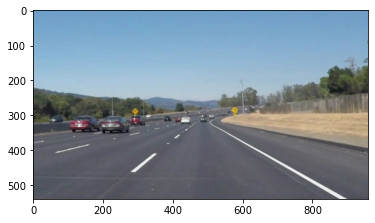

In [3]:
plt.imshow(image)

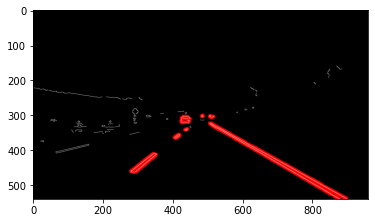

In [4]:
plt.imshow(lines_edges)

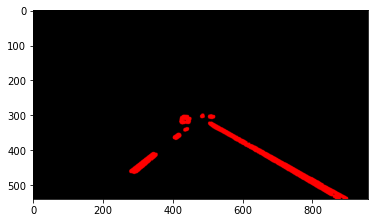

In [5]:
plt.imshow(line_image)

# Extracting X and Y coordinates

In [6]:
points = []
x_points = []
y_points = []

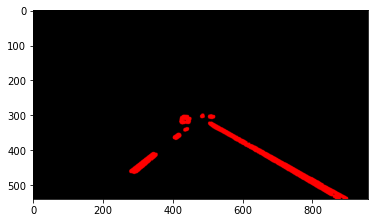

In [7]:
line_image = np.copy(image)*0 # creating a blank to draw lines on
for line in lines:
    for x1,y1,x2,y2 in line:
        startx = min(x1,x2)
        endx = max(x1,x2)
        if x2-x1 != 0:
            slope = (y2-y1)/(x2-x1)
        else:
            pass
        for i in range(startx,endx+1):
            y = slope*(i-x2) + y2
            #if y != math.inf and not math.isnan(y):
            points.append([i,y])
            x_points.append(i)
            y_points.append(y)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        
plt.imshow(line_image)
#print(points)

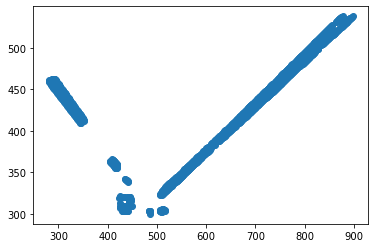

In [8]:
plt.scatter(x_points,y_points)

# Curve Fitting Using Scipy

In [39]:
def linear(x, a, b):
	return a * x + b
def quad(x, a, b,c):
	return a * x**2 + b *x + c

In [88]:
def curve(obj,x,y):    
    popt, _ = curve_fit(obj, x, y)
    a, b,c= popt
    #plt.scatter(x, y)
    x_line = arange(min(x),max(x),1)
    y_line = quad(x_line, a, b,c)
    return(x_line,y_line)

# Birch Clustering

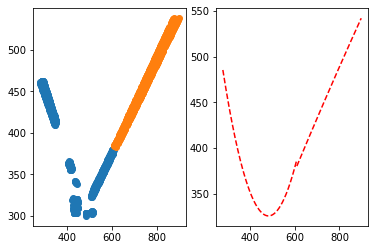

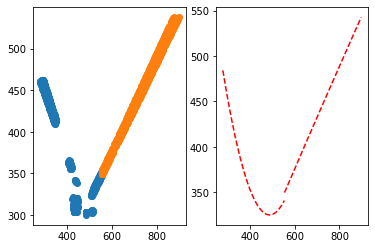

In [92]:
# define the model
for i in range(180,200,10):
    model = Birch(threshold= i, n_clusters=2)
    # fit the model
    model.fit(points)
    # assign a cluster to each example
    yhat = model.predict(points)
    # retrieve unique clusters
    clusters = unique(yhat)
    figure, axis = plt.subplots(1, 2)
    # create scatter plot for samples from each cluster
    store_x,store_y = [],[]
    for cluster in clusters:
        
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        row_ix = row_ix[0]
        
        new_x = []
        new_y = []
        for i in row_ix:
            new_x.append(points[i][0])
            new_y.append(points[i][1])

        axis[0].scatter(new_x,new_y)
        x_line,y_line = curve(quad, new_x,new_y)
        store_x += [x_line]
        store_y += [y_line]
        axis[1].plot(x_line, y_line, '--', color='red')
        
#     mid_x,mid_y = [],[]
    
    
    
#     for i in range(0,200):
#         mid_x.append((store_x[0][i] + store_x[1][i])/2)
#         mid_y.append((store_y[0][i] + store_y[1][i])/2)
    
#     axis[1].plot(mid_x, mid_y, '--', color='blue')
    
    # show the plot
    plt.show()